Visualize with a Gaussian density profile
===

In [13]:
# Importing usefull tools

from numpy import *
import matplotlib.pyplot as plt
import profile

In [14]:
# Usefull functions

# def gauss(x,sigma,mean = 0): return exp(-(x-mean)**2/(2*sigma**2))/(sqrt(2*pi)*sigma)
def volume(R): return 4/3 * pi * R**3
def mass(rho): return 4 * pi * sum(rho * r**2 * dr)
def sec_to_year(s): return s / 3600 / 24 / 365

def plot(mod,r,res,theo=None):
    _,ax1 = plt.subplots()
    l1 = ax1.plot(r,res,'bx',label="Code results")
    ax1.set_xlabel("r [cm]")
    ax1.set_label("Density [g.cm-3]")
    lns = l1

    if theo is not None:
        ax2 = ax1.twinx()
        l2 = ax2.plot(r,theo,'r',label="Analytic results")
        ax2.set_xlabel("r [cm]")

        if mod is not None:
            if mod.lower()=="density":
                ax2.set_label("Density [g.cm-3]")
            elif mod.lower()=="speed":
                ax2.set_label("Speed [cm.s-1]")
        lns = l1+l2

    # added these three lines
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0)

    if mod is not None:
        if mod.lower()=="density":
            plt.title("Density profile")
        elif mod.lower()=="speed":
            plt.title("Speed profile")
        else:
            plt.title(mod)

    plt.grid()
    plt.show()

In [15]:
# Declaring constants

kb = 1.3806503e-16
Na = 6.022e23
mH = 1.67262178e-27
G = 6.67408e-8
Msun = 2e33
parsec_to_cm = 3.08567758e18
mu = 1.4
Temp = 10 # [K]
cs = sqrt(kb * Temp / (mu * mH))
rho_0 = Msun / volume(0.1/2*parsec_to_cm)
tff = sqrt(3*pi/(32 * G * rho_0))

In [16]:
# Getting all generated data

try:
    rho = loadtxt("results/rho.dat")
    v   = loadtxt("results/v.dat")
    t   = loadtxt("results/time.dat")
    r   = loadtxt("results/space.dat")
except:
    raise NameError("You must run the 'main_test.f90' program first. \n Please run :\n - gfortran .\Constants.f90 .\Prestel.f90 .\main_test.f90\n - ./a.exe")

In [17]:
N = size(r)
sigma = N/2
dt = tff / (N-1)
dr = (r[-1] - r[0]) / (N-1)
print("tff =", round(sec_to_year(tff),2),"years")

tff = 184743.17 years


---
State at $t_0$
===

Integration of density on the sphere (to get the mass in sun mass unit)
Excpected:    1.0151872400826445
Analytic:     2.1262031836411564e-24
Code result:  2.1262031836411564e-24


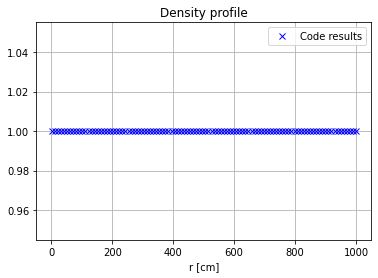

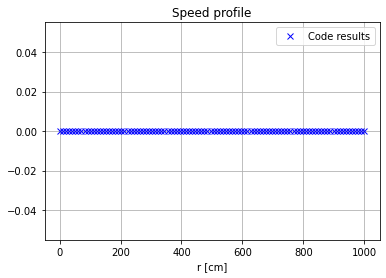

In [18]:
plot("density",r,rho[0])
plot("speed",r,v[0])

---
State at $t_1$
===

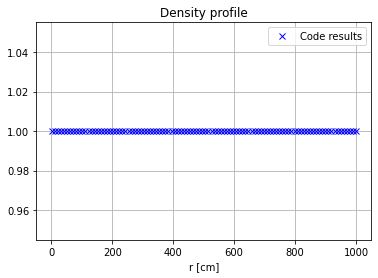

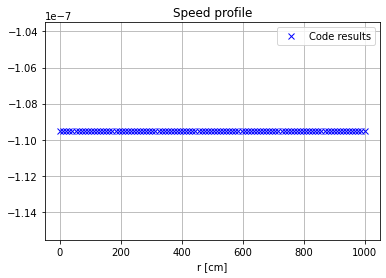

In [19]:
plot("density",r,rho[1])
plot("speed",r,v[1])

---
State at $t_2$
===

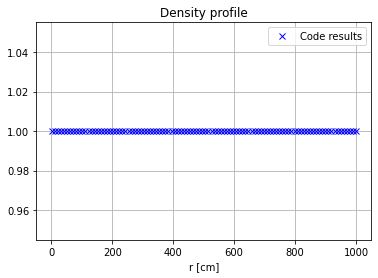

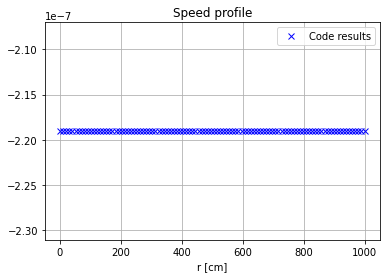

In [20]:
plot("density",r,rho[2])
plot("speed",r,v[2])

---
State at $t_3$
===

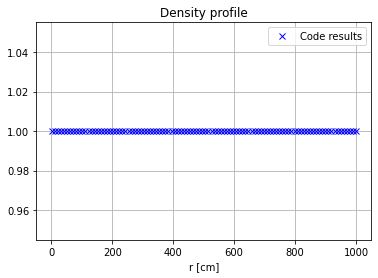

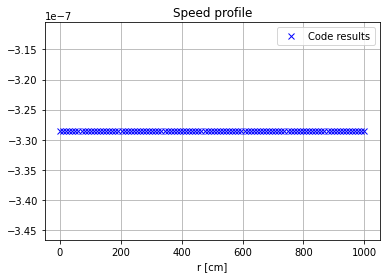

In [21]:
plot("density",r,rho[3])
plot("speed",r,v[3])

---
State at $t_4$
===

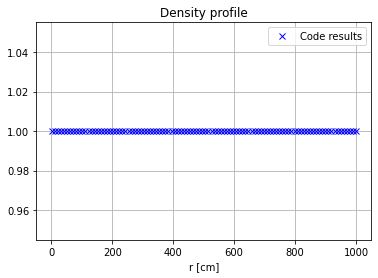

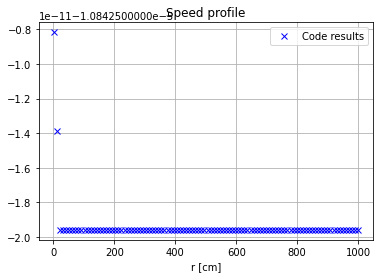

In [22]:
plot("density",r,rho[4])
plot("speed",r,v[-1])

---
Global evolution
===

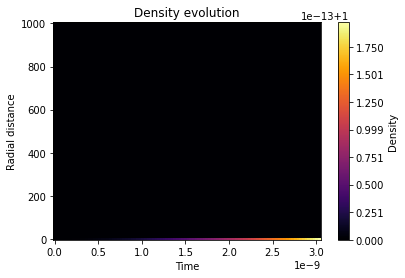

1.0
1.0
1.0000000000001972
1.0


In [23]:
plt.pcolor(t,r,rho.transpose(), shading='auto', cmap="inferno")
plt.colorbar(label='Density')
plt.xlabel("Time")
plt.ylabel("Radial distance")
plt.title("Density evolution")
plt.show()

print(rho[0,0])
print(rho[-1,-1])
print(rho[-1,0])
print(rho[0,-1])

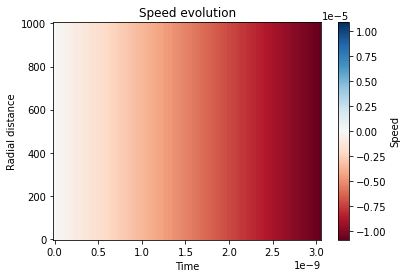

In [24]:
tmp = max(abs(amin(v)),abs(amax(v)))
plt.pcolor(t,r,v.transpose(), shading='auto', cmap="RdBu", vmin = -tmp, vmax = tmp)
plt.colorbar(label='Speed')
plt.xlabel("Time")
plt.ylabel("Radial distance")
plt.title("Speed evolution")
plt.show()